In [70]:
#########################################################################
############################# 1. Algorithme #############################
#########################################################################
'''
On veut séparer nos données en clusters/groupes.
1. On initialise les centres de nos clusters (centroïdes) => on choisit donc des valeurs aléatoires qui seront nos clusters
2. On update les classes de nos clusters => on assigne les points au centre cluster le plus proche
3. On update nos centroïdes par la moyenne de chaque cluster
4. On itère sur les étapes 2/3 jusqu'à la convergence ou un nombre d'itérations max

On a besoin :
1. Tableau de données
2. Tableau de centroïdes
3. Tableau de clusters en fonction des centroïdes

On a besoin aussi :
- de la distance euclidienne
- d'une boucle pour trier les points en cluster en fonction de cette distance.
- recalculer les centroïdes
- comparer les anciens et nouveaux centroïdes poursavoir quand s'arrêter
'''
#########################################################################
############################# 2. Codage #############################
#########################################################################
################################## et ###################################
#########################################################################
############################# 3. Evaluation #############################
#########################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

dataset = pd.read_table('C:/Users/sarah/OneDrive/Bureau/Files/ESIEA/4A/MajeureDataIA/Ingénierie des données/TD2/base1.txt',header=None,sep=" ")
dataset.describe()
X = dataset.iloc[:, [0, 1]].values #on enlève les classes/labels pour garder que x et y coordonnées des points
X

array([[-0.423809,  0.173816],
       [-0.732064, -0.07982 ],
       [-0.284335,  0.717345],
       [-0.243749,  0.341101],
       [-0.602286,  0.552602],
       [-0.017939,  0.529274],
       [-0.018377,  0.476127],
       [-0.325077,  0.219774],
       [-0.233845,  0.233974],
       [-0.272008,  0.377153],
       [-0.362345,  0.174289],
       [-0.134221,  0.206785],
       [-0.462747,  0.83888 ],
       [ 0.230128,  0.484696],
       [-0.349767,  0.166431],
       [-0.287185,  0.460453],
       [-0.048976,  0.188674],
       [-0.300848,  0.133441],
       [-0.33958 ,  0.405485],
       [-0.523756,  0.709127],
       [-0.242065,  0.502921],
       [-0.649714,  0.634877],
       [-0.137087,  0.178805],
       [ 0.090222,  0.355609],
       [-0.488612,  0.40515 ],
       [-0.101169,  0.167472],
       [-0.002168,  0.140901],
       [-0.714101,  0.703565],
       [-0.675909,  0.473571],
       [-0.172881,  0.309474],
       [-0.41564 ,  0.672192],
       [-0.143169,  0.528667],
       [

In [71]:
X[:,0] #tous les x
X[:,1] #tous les y

array([ 0.173816, -0.07982 ,  0.717345,  0.341101,  0.552602,  0.529274,
        0.476127,  0.219774,  0.233974,  0.377153,  0.174289,  0.206785,
        0.83888 ,  0.484696,  0.166431,  0.460453,  0.188674,  0.133441,
        0.405485,  0.709127,  0.502921,  0.634877,  0.178805,  0.355609,
        0.40515 ,  0.167472,  0.140901,  0.703565,  0.473571,  0.309474,
        0.672192,  0.528667,  0.22332 ,  0.805657,  0.543136,  0.840489,
        0.755267,  0.299726,  0.147776,  0.452529,  0.388111,  0.259853,
        0.595203,  0.842883,  0.334141,  0.259071,  0.409176,  0.636516,
        0.257211,  0.170432,  0.440793,  0.454437,  0.592084,  0.321888,
        0.433343,  0.362072,  0.450928,  0.854548,  0.31914 ,  0.13392 ,
        0.588106,  0.244868,  0.47973 ,  0.313877,  0.60461 ,  0.608981,
        0.419838, -0.042821,  0.5039  ,  0.868995,  0.725363,  0.07566 ,
        0.451095,  0.300346,  0.214622,  0.162172,  0.542962,  0.363434,
        0.484711,  0.378792,  0.354517,  0.5635  , 

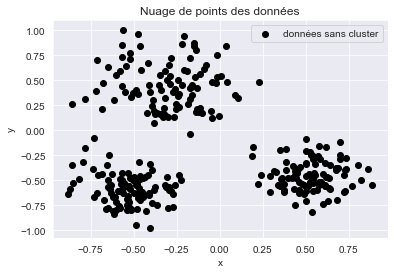

In [72]:
#dispersion originale des données

plt.scatter(X[:,0],X[:,1],c='black',label='données sans cluster')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Nuage de points des données')
plt.show()

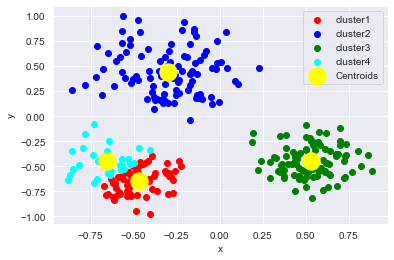

In [73]:
m = X.shape[0] #nombre de données d'entraînements, m = 300
n = X.shape[1] #nombre de features, n=2
n_iter=100 #nombre d'itérations
K = 4 #nombre de clusters

#tableau vide de centroïdes de 2 lignes (x et y) et 0 colonne car on aura plus tard autant de colonnes que de centroïdes par
#concaténation
Centroids=np.array([]).reshape(n,0) #on initialise les centroïdes à partir des données

#on tire des lignes de X au hasard
rand=rd.randint(0,m-1)
X[rand]

#Centroids est une matrice de dimension n (x et y) par K (nombre de clusters) par concaténation
#chaque colonne est un centroïde pour un cluster
for i in range(K):
    rand=rd.randint(0,m-1) #il choisit des numéros de lignes au hasard
    #on concatène le tableau vide avec les lignes de X correspondantes à celles tirées avec rand pour chaque K (nombre de cluster donc nombre de centroïdes)
    Centroids=np.c_[Centroids,X[rand]]
    
#on initialise un tableau vide de 300 lignes (données) et 0 colonnes car on aura plus tard autant de colonnes que de centroïdes par
#concaténation
distanceuclidienne = np.array([]).reshape(m,0)

#on calcule la distance entre les données et chaque centroïde
for k in range(K):
    distance=np.sum((X-Centroids[:,k])**2,axis=1)
    distanceuclidienne=np.c_[distanceuclidienne,distance]
#on retourne une liste de distances : 300 lignes (pour les données) et k colonnes (distances à chacun des centroïdes)    


#on extrait l'indice de la valeur minimum de chaque ligne
minim=np.argmin(distanceuclidienne,axis=1)+1 

#on veut regrouper les données en cluster en se basant sur les index récupérés et les stocker dans un dictionnaire
#on veut aussi calculer la moyenne de chaque cluster et assigner la valeur comme nouveau centroïde

#Y est un dictionnaire qui représente un cluster à chaque index. Pour K=5, il y a donc 5 index. A chaque index est renvoyé la liste de
#point et leurs coordonnées x et y associé à cet index
clusters={}

#on commence à indexer Y à 1 pour le 1er cluster et ainsi de suite jusqu'à K (nombre de clusters) puis on concatène avec les
#données dans X
for k in range(K):
    clusters[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    clusters[minim[i]]=np.c_[clusters[minim[i]],X[i]]    
for k in range(K):
    clusters[k+1]=clusters[k+1].T
    
#on calcule la moyenne dans chaque cluster/dictionnaire    
for k in range(K):
     Centroids[:,k]=np.mean(clusters[k+1],axis=0)

#on itère
for i in range(n_iter):
    #distance euclidienne
    distanceuclidienne=np.array([]).reshape(m,0)
    for k in range(K):
        distance=np.sum((X-Centroids[:,k])**2,axis=1)
        distanceuclidienne=np.c_[distanceuclidienne,distance]
    minim=np.argmin(distanceuclidienne,axis=1)+1
    #classer en cluster dans un dictionnaire
    clusters={}
    for k in range(K):
        clusters[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        clusters[minim[i]]=np.c_[clusters[minim[i]],X[i]]
    for k in range(K):
        clusters[k+1]=clusters[k+1].T    
    for k in range(K):
        Centroids[:,k]=np.mean(clusters[k+1],axis=0)   
    Output=clusters
#la sortie est le dictionnaire de cluster avec les points associés qu'on a juste à tracer ensuite

#on plot les données dans leurs clusters
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(clusters[k+1][:,0],clusters[k+1][:,1],c=color[k],label=labels[k]) 
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [74]:
#calcul des variance intra-cluster
variance = [] #tableau vide de variance (utile pour faire la somme et avoir le coût)

for k in range(K):
    variance.append(np.var(clusters[k+1]))
    #print(np.var(Output[k+1]))

print(variance)

#coût
print(sum(variance))
'''
On a en sortie ici, la variance intra de chacun des clusters.
Pour que le clustering soit bon, on veut minimiser la variance intra-cluster et maximiser la variance inter-cluster.
Il suffit de changer k dans la cellule d'avant, relancer cette cellule-ci et comparer et calculer les variances.
'''

[0.021725768699994742, 0.1873894228815129, 0.2606996803321468, 0.026262654637871096]
0.49607752655152554


"\nOn a en sortie ici, la variance intra de chacun des clusters.\nPour que le clustering soit bon, on veut minimiser la variance intra-cluster et maximiser la variance inter-cluster.\nIl suffit de changer k dans la cellule d'avant, relancer cette cellule-ci et comparer et calculer les variances.\n"

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


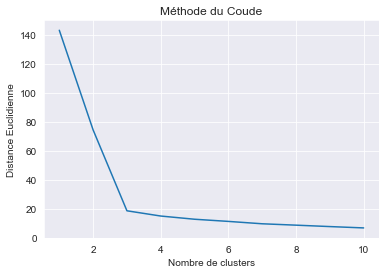

'\nOn voit clairement ici que le nombre optimal de k est 3.\n'

In [75]:
#Méthode du Coude : trouver le nombre de k optimal
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Distance Euclidienne')
plt.show()

'''
On voit clairement ici que le nombre optimal de k est 3.
'''

In [76]:
'''
On refait l'initialisation pour k = 5 et on compare les variances intra-clusters avec celles trouvées précédemment.
'''
K = 5
Centroids=np.array([]).reshape(n,0) #on initialise les centroïdes à partir des données
Centroids

rand=rd.randint(0,m-1)
X[rand]

for i in range(K):
    rand=rd.randint(0,m-1) #il choisit des numéros de lignes au hasard
    #on concatène le tableau vide avec les lignes de X correspondantes à celles tirées avec rand pour chaque K (nombre de cluster donc nombre de centroïdes)
    Centroids=np.c_[Centroids,X[rand]]

distanceuclidienne = np.array([]).reshape(m,0)
for k in range(K):
    distance=np.sum((X-Centroids[:,k])**2,axis=1)
    distanceuclidienne=np.c_[distanceuclidienne,distance]

minim=np.argmin(distanceuclidienne,axis=1)+1 

clusters={}
#pour chaque K, 
for k in range(K):
    clusters[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    clusters[minim[i]]=np.c_[clusters[minim[i]],X[i]]
     
for k in range(K):
    clusters[k+1]=clusters[k+1].T
    
#on calcule la moyenne dans chaque cluster/dictionnaire    
for k in range(K):
     Centroids[:,k]=np.mean(clusters[k+1],axis=0)

#on itère
for i in range(n_iter):
    #distance euclidienne
    distanceuclidienne=np.array([]).reshape(m,0)
    for k in range(K):
        distance=np.sum((X-Centroids[:,k])**2,axis=1)
        distanceuclidienne=np.c_[distanceuclidienne,distance]
    minim=np.argmin(distanceuclidienne,axis=1)+1
    #classer en cluster dans un dictionnaire
    clusters={}
    for k in range(K):
        clusters[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        clusters[minim[i]]=np.c_[clusters[minim[i]],X[i]]    
    for k in range(K):
        clusters[k+1]=clusters[k+1].T    
    for k in range(K):
        Centroids[:,k]=np.mean(clusters[k+1],axis=0) 
    Output=clusters

#on affiche les variances intra-cluster
variance = [] #tableau vide de variance (utile pour faire la somme et avoir le coût)

for k in range(K):
    variance.append(np.var(clusters[k+1]))
    #print(np.var(Output[k+1]))

print(variance)

#coût
print(sum(variance))

[0.26023425069450334, 0.026139082038534347, 0.01931524863405165, 0.24162033898266708, 0.1873894228815129]
0.7346983432312693


In [77]:
'''
On refait l'initialisation pour k = 3 et on compare les variances intra-clusters avec celles trouvées précédemment.
'''
K = 3
Centroids=np.array([]).reshape(n,0) #on initialise les centroïdes à partir des données
Centroids

rand=rd.randint(0,m-1)
X[rand]

for i in range(K):
    rand=rd.randint(0,m-1) #il choisit des numéros de lignes au hasard
    #on concatène le tableau vide avec les lignes de X correspondantes à celles tirées avec rand pour chaque K (nombre de cluster donc nombre de centroïdes)
    Centroids=np.c_[Centroids,X[rand]]

distanceuclidienne = np.array([]).reshape(m,0)
for k in range(K):
    distance=np.sum((X-Centroids[:,k])**2,axis=1)
    distanceuclidienne=np.c_[distanceuclidienne,distance]

minim=np.argmin(distanceuclidienne,axis=1)+1 

clusters={}
#pour chaque K, 
for k in range(K):
    clusters[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    clusters[minim[i]]=np.c_[clusters[minim[i]],X[i]]
     
for k in range(K):
    clusters[k+1]=clusters[k+1].T
    
#on calcule la moyenne dans chaque cluster/dictionnaire    
for k in range(K):
     Centroids[:,k]=np.mean(clusters[k+1],axis=0)

#on itère
for i in range(n_iter):
    #distance euclidienne
    distanceuclidienne=np.array([]).reshape(m,0)
    for k in range(K):
        distance=np.sum((X-Centroids[:,k])**2,axis=1)
        distanceuclidienne=np.c_[distanceuclidienne,distance]
    minim=np.argmin(distanceuclidienne,axis=1)+1
    #classer en cluster dans un dictionnaire
    clusters={}
    for k in range(K):
        clusters[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        clusters[minim[i]]=np.c_[clusters[minim[i]],X[i]]    
    for k in range(K):
        clusters[k+1]=clusters[k+1].T    
    for k in range(K):
        Centroids[:,k]=np.mean(clusters[k+1],axis=0) 
    Output=clusters

#on affiche les variances intra-cluster
variance = [] #tableau vide de variance (utile pour faire la somme et avoir le coût)

for k in range(K):
    variance.append(np.var(clusters[k+1]))
    #print(np.var(Output[k+1]))

print(variance)

#coût
print(sum(variance))

[0.2606996803321468, 0.1873894228815129, 0.023167726368015593]
0.4712568295816753


In [78]:
'''
On refait l'initialisation pour k = 6 et on compare les variances intra-clusters avec celles trouvées précédemment.
'''
K = 6
Centroids=np.array([]).reshape(n,0) #on initialise les centroïdes à partir des données
Centroids

rand=rd.randint(0,m-1)
X[rand]

for i in range(K):
    rand=rd.randint(0,m-1) #il choisit des numéros de lignes au hasard
    #on concatène le tableau vide avec les lignes de X correspondantes à celles tirées avec rand pour chaque K (nombre de cluster donc nombre de centroïdes)
    Centroids=np.c_[Centroids,X[rand]]

distanceuclidienne = np.array([]).reshape(m,0)
for k in range(K):
    distance=np.sum((X-Centroids[:,k])**2,axis=1)
    distanceuclidienne=np.c_[distanceuclidienne,distance]

minim=np.argmin(distanceuclidienne,axis=1)+1 

clusters={}
#pour chaque K, 
for k in range(K):
    clusters[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    clusters[minim[i]]=np.c_[clusters[minim[i]],X[i]]
     
for k in range(K):
    clusters[k+1]=clusters[k+1].T
    
#on calcule la moyenne dans chaque cluster/dictionnaire    
for k in range(K):
     Centroids[:,k]=np.mean(clusters[k+1],axis=0)

#on itère
for i in range(n_iter):
    #distance euclidienne
    distanceuclidienne=np.array([]).reshape(m,0)
    for k in range(K):
        distance=np.sum((X-Centroids[:,k])**2,axis=1)
        distanceuclidienne=np.c_[distanceuclidienne,distance]
    minim=np.argmin(distanceuclidienne,axis=1)+1
    #classer en cluster dans un dictionnaire
    clusters={}
    for k in range(K):
        clusters[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        clusters[minim[i]]=np.c_[clusters[minim[i]],X[i]]    
    for k in range(K):
        clusters[k+1]=clusters[k+1].T    
    for k in range(K):
        Centroids[:,k]=np.mean(clusters[k+1],axis=0) 
    Output=clusters

#on affiche les variances intra-cluster
variance = [] #tableau vide de variance (utile pour faire la somme et avoir le coût)

for k in range(K):
    variance.append(np.var(clusters[k+1]))
    #print(np.var(Output[k+1]))

print(variance)

#coût
print(sum(variance))

[0.03888127168328395, 0.1873894228815129, 0.24162033898266708, 0.26023425069450334, 0.00975539307358471, 0.0184905924394096]
0.7563712697549616


In [ ]:
'''
On compare les variances intra-cluster pour différentes valeurs de k :

k = 3
[0.1873894228815129, 0.023167726368015593, 0.2606996803321468]
coût = 0.47125682958167525

k = 4
[0.12121062344751923, 0.2606996803321468, 0.023167726368015593, 0.2480942311274178]
coût = 0.6531722612750994

k = 5
[0.019319306733454347, 0.2606996803321468, 0.00998406730261848, 0.03327289027879959, 0.1873894228815129]
coût = 0.5106653675285321

k = 6
[0.3448218948099097, 0.1608638989385463, 0.030268305904113904, 0.020645572560126398, 0.1873894228815129, 0.23530630327835791]
coût = 0.7575091581249263

Il semble donc plus intéressants de prendre k = 3 car les variance intra sont basses ! 
Cela se confirme avec la méthode de coude qui montre que k optimal = 3.

'''

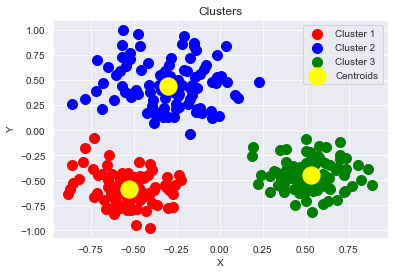

In [79]:
############################# Vérification #############################
'''
On peut vérifier nos résultats avec la fonction kmean de la librairie sklearn.
'''
####################################################################

kmeans = KMeans(n_clusters = 3, init = 'random', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
#visualisation des clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

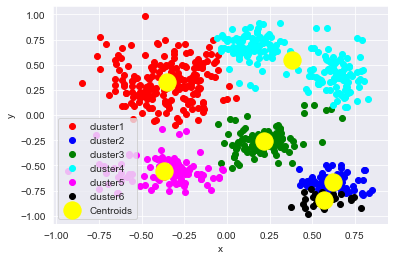

In [80]:
############################# On fait pareil pour base 3 #############################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

dataset = pd.read_table('C:/Users/sarah/OneDrive/Bureau/Files/ESIEA/4A/MajeureDataIA/Ingénierie des données/TD2/base3.txt',header=None,sep=" ")
dataset.describe()
Xb3 = dataset.iloc[:, [0, 1]].values #on enlève les classes/labels pour garder que x et y coordonnées des points
Xb3

m = Xb3.shape[0] #nombre de données d'entraînements
n = Xb3.shape[1] #nombre de features
n_iter=100 #nombre d'itérations
K = 6 #nombre de clusters

#tableau vide de centroïdes de 2 lignes (x et y) et 0 colonne car on aura plus tard autant de colonnes que de centroïdes par
#concaténation
Centroids=np.array([]).reshape(n,0) #on initialise les centroïdes à partir des données

#on tire des lignes de X au hasard
rand=rd.randint(0,m-1)
Xb3[rand]

#Centroids est une matrice de dimension n (x et y) par K (nombre de clusters) par concaténation
#chaque colonne est un centroïde pour un cluster
for i in range(K):
    rand=rd.randint(0,m-1) #il choisit des numéros de lignes au hasard
    #on concatène le tableau vide avec les lignes de X correspondantes à celles tirées avec rand pour chaque K (nombre de cluster donc nombre de centroïdes)
    Centroids=np.c_[Centroids,Xb3[rand]]
    
#on initialise un tableau vide de 300 lignes (données) et 0 colonnes car on aura plus tard autant de colonnes que de centroïdes par
#concaténation
distanceuclidienne = np.array([]).reshape(m,0)

#on calcule la distance entre les données et chaque centroïde
for k in range(K):
    distance=np.sum((Xb3-Centroids[:,k])**2,axis=1)
    distanceuclidienne=np.c_[distanceuclidienne,distance]
#on retourne une liste de distances : 300 lignes (pour les données) et k colonnes (distances à chacun des centroïdes)    


#on extrait l'indice de la valeur minimum de chaque ligne
minim=np.argmin(distanceuclidienne,axis=1)+1 

#on veut regrouper les données en cluster en se basant sur les index récupérés et les stocker dans un dictionnaire
#on veut aussi calculer la moyenne de chaque cluster et assigner la valeur comme nouveau centroïde

#Y est un dictionnaire qui représente un cluster à chaque index. Pour K=5, il y a donc 5 index. A chaque index est renvoyé la liste de
#point et leurs coordonnées x et y associé à cet index
clusters={}

#on commence à indexer Y à 1 pour le 1er cluster et ainsi de suite jusqu'à K (nombre de clusters) puis on concatène avec les
#données dans X
for k in range(K):
    clusters[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    clusters[minim[i]]=np.c_[clusters[minim[i]],Xb3[i]]    
for k in range(K):
    clusters[k+1]=clusters[k+1].T
    
#on calcule la moyenne dans chaque cluster/dictionnaire    
for k in range(K):
     Centroids[:,k]=np.mean(clusters[k+1],axis=0)

#on itère
for i in range(n_iter):
    #distance euclidienne
    distanceuclidienne=np.array([]).reshape(m,0)
    for k in range(K):
        distance=np.sum((Xb3-Centroids[:,k])**2,axis=1)
        distanceuclidienne=np.c_[distanceuclidienne,distance]
    minim=np.argmin(distanceuclidienne,axis=1)+1
    #classer en cluster dans un dictionnaire
    clusters={}
    for k in range(K):
        clusters[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        clusters[minim[i]]=np.c_[clusters[minim[i]],Xb3[i]]
    for k in range(K):
        clusters[k+1]=clusters[k+1].T    
    for k in range(K):
        Centroids[:,k]=np.mean(clusters[k+1],axis=0)   
    Output=clusters
#la sortie est le dictionnaire de cluster avec les points associés qu'on a juste à tracer ensuite

#on plot les données dans leurs clusters
color=['red','blue','green','cyan','magenta', 'black']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5', 'cluster6']
for k in range(K):
    plt.scatter(clusters[k+1][:,0],clusters[k+1][:,1],c=color[k],label=labels[k]) 
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


C:\Users\sarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


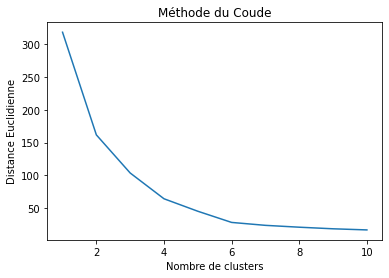

'\nEn regardant le coude, on voit que le nombre optimal de k est entre 5 et 6.\n'

In [112]:
#Méthode du Coude : trouver le nombre de k optimal
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Xb3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Distance Euclidienne')
plt.show()


'''
En regardant le coude, on voit que le nombre optimal de k est entre 5 et 6.
'''

In [113]:
#calcul des variance intra-cluster

for k in range(K):
    print(np.var(Output[k+1]))
    
'''
On a en sortie ici, la variance intra de chacun des 6 clusters.
Pour que le clustering soit bon, on veut minimiser la variance intra-cluster et maximiser la variance inter-cluster.
Il suffit de changer k dans la cellule d'avant, relancer cette cellule-ci et comparer et calculer les variances.
'''

0.0990238401365682
0.03506661786951206
0.1452460087591105
0.032785840158785606
0.4514596809596511
0.06796442256687721


"\nOn a en sortie ici, la variance intra de chacun des 6 clusters.\nPour que le clustering soit bon, on veut minimiser la variance intra-cluster et maximiser la variance inter-cluster.\nIl suffit de changer k dans la cellule d'avant, relancer cette cellule-ci et comparer et calculer les variances.\n"

In [168]:
#########################################################################
############################# 4. Application #############################
#########################################################################
'''
On souhaite reconnaître des chiffres manuscrits. Télécharger la base Digits et la séparer en deux bases d’apprentissage (70%) et de test (fonction traintestsplit).

Clustering : 
Déterminer k=10 clusters et mesurer leur pureté p. Pour le cluster i :
pi = #exemples de la classe majoritaire du cluster/ #exemples dans le cluster

Estimer la moyenne et la variance de p. Que peut-on conclure ?
Effectuer plusieurs initialisations et répéter les expériences précédentes. Conclure.

Classification :
Utiliser l’algorithme des k-moyennes pour déterminer, dans chaque classe, k’ centroïdes (k’ = 1, 2, …).
Utiliser l’algorithme du plus-proche-voisin pour classer la base de test en utilisant comme base d’apprentissage les 10k’ centroïdes précédents. 
Effectuer, pour chaque valeur de k’, plusieurs initialisations et estimer la moyenne et la variance des taux de reconnaissance obtenus. Rapporter ces résultats dans un tableau/graphe. Conclure. 
'''
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import numpy as np
import sklearn
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


digits = load_digits()
print(digits.data.shape) #1797 exemples pour 64 descripteurs => dimension 64

#on sépare les données en data et en target (label)
#X = scale(digits.data)
X = digits.data
y = digits.target

#on initialise le nombre de cluster à 10 et on définit le nombre d'exemples et de descripteurs à 1767 et 64 
k = 10
samples, features = digits.data.shape

(1797, 64)


In [169]:
print("Nombre de pixels :      {}".format(X.shape[1]))
print("Nombre d'observations : {}".format(X.shape[0]))
print("Nombre de classes :     {}".format(len(np.unique(y))))

Nombre de pixels :      64
Nombre d'observations : 1797
Nombre de classes :     10


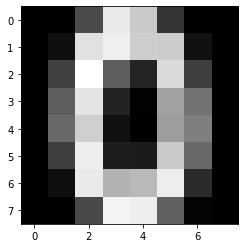

In [170]:
#plt.gray()
#plt.matshow(digits.images[0])
#plt.show()


imgplot = plt.imshow(np.reshape(np.mean(X[y == 0, :], axis=0), (8, 8)),
                     cmap='gray', aspect='equal', interpolation='nearest')

In [171]:
#on sépare la base en 70% de données d'apprentissage et donc 30% de données test
'''
On procède de manière classique en réservant 70% des données pour la partie apprentissage, et 30% pour l'évaluation des classifieurs que 
l'on a construit sur la première partie. En effet il n'est pas raisonnable de tester la perfromance sur 100% des données. 
Cela donnera lieux à du sur-apprentissage (en: overfitting). 
La généralisation des méthodes apprises serait alors très mauvaise
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1257, 64) (540, 64) (1257,) (540,)


In [172]:
#on choisit notre modèle avec un nombre de clusters à 10
model = KMeans(n_clusters=10)

In [173]:
#on rentre nos données d'entraînements dans le modèle
#on l'entraîne
model.fit(X_train, y_train)

KMeans(n_clusters=10)

In [174]:
#on prédit ensuite les labels sur nos données de test
predictions = model.predict(X_test)

In [175]:
#accuracy : pourcentage de bonnes predictions

from sklearn.metrics import accuracy_score
from scipy.stats import mode

#on match chaque cluster à son identité ---- trouvé sur internet car avant cette étape l'accuracy était anormale ! ----
#en effet, le cluster ne sait pas qu'il est le chiffre 1 par exemple, il faut donc intégrer cette identité

#clusters = model.fit_predict(X)
clusters = model.predict(X)
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
acc10 = accuracy_score(digits.target, labels)

#pourcentage d'erreur du modèle (on peut changer cas pour changer ce % et dc améliorer la performance)
#combien de nos prédictions sont correctement classées ?
#en changeant le k on peut changer ce score
#plusieurs méthodes

#methode 1
#1 - model.score(X_test, y_test)
#methode 2
#acc = np.sum(predictions == y_test)/len(y_test)
#print(acc)
#methode 3
#model.score(X_test, y_test)

In [176]:
acc10

0.8030050083472454

In [190]:
#voici les différents centroïdes
len(model.cluster_centers_) #10 centroïdes pour les 10 clusters
centroids = model.cluster_centers_ #coordonnées de chacun des centroïdes (64 coordonnées car dimension 64)
centroids

array([[ 0.00000000e+00,  1.16438356e-01,  4.80136986e+00,
         1.29383562e+01,  1.38767123e+01,  1.11506849e+01,
         5.40410959e+00,  8.76712329e-01,  2.16840434e-18,
         9.10958904e-01,  1.03082192e+01,  1.15821918e+01,
         1.05136986e+01,  1.26369863e+01,  5.53424658e+00,
         5.68493151e-01,  2.16840434e-18,  8.35616438e-01,
         5.35616438e+00,  2.40410959e+00,  6.80136986e+00,
         1.14794521e+01,  3.28767123e+00,  1.23287671e-01,
         5.42101086e-19,  8.21917808e-01,  4.64383562e+00,
         6.36986301e+00,  1.20821918e+01,  1.17602740e+01,
         4.61643836e+00,  1.08420217e-18,  0.00000000e+00,
         1.32191781e+00,  8.17123288e+00,  1.30205479e+01,
         1.47465753e+01,  1.08287671e+01,  4.06164384e+00,
         0.00000000e+00, -1.73472348e-18,  1.16438356e+00,
         5.07534247e+00,  1.14452055e+01,  1.11780822e+01,
         4.04794521e+00,  5.95890411e-01,  1.73472348e-17,
         5.20417043e-18,  7.53424658e-02,  2.86301370e+0

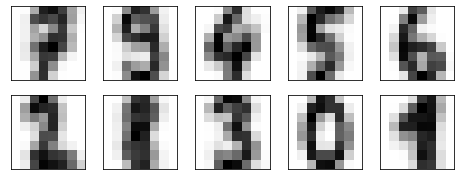

In [191]:
#représentation des centres des clusters => donc les centroïdes précédents
#les différents clusters correspondent aux différents chiffres de 0 à 9
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = model.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [193]:
'''
Déterminer k=10 clusters et mesurer leur pureté p. Pour le cluster i :
pi = #exemples de la classe majoritaire du cluster/ #exemples dans le cluster

Estimer la moyenne et la variance de p. Que peut-on conclure ?
Effectuer plusieurs initialisations et répéter les expériences précédentes. Conclure.

RAPPEL : L’indice de pureté produit un résultat dans l’intervalle [0, 1], où une valeur de 1 indique
que U et V sont identiques.
La pureté d’un cluster est le pourcentage de données appartenant à la classe majoritaire.
'''
#pour calculer la pureté de chaque cluster, on veut un tableau de points liés aux centroides calculés plus tôt et qu'on
#a représenté => centroids
#pour cela, on calcule la distance euclidienne de chaque point aux centroïdes et on associe à chaque point le centroïde où la distance est la
#minimale. On pourra donc faire le rapport des classes de chaque point lié pour mesurer la pureté pour chaque cluster.

from sklearn.metrics import homogeneity_score

homogeneity_score(digits['target'], labels)

0.7448405093504473

In [34]:
len(centroids)
indice = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
indice

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [35]:
#algorithme des plus proches voisins

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

X1 = centroids #données
y1 = indice #indice de centroids

# on divise en set d'entraînement et de tests
#test_size = 0.3 <=> train_size = 0.7 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3)

#on crée un classificateur avec k = 3
model1 = neighbors.KNeighborsClassifier(n_neighbors=3)

#on ajuste le modèle avec nos données et nos labels d'entraînement
model1.fit(X1_train, y1_train)
#knn.fit(X_train, y_train)

#on veut prédire des labels sur nos données de test
#print(knn.predict(X_test))
predictions = model1.predict(X1_test)
predictions

#pourcentage d'erreur du modèle (on peut changer cas pour changer ce % et dc améliorer la performance)
#combien de nos prédictions sont correctement classées ?
#en changeant le k on peut changer ce score
#plusieurs méthodes

#methode 1
1 - model1.score(X_test, y_test)
#methode 2
#acc = np.sum(predictions == y_test)/len(y_test)
#print(acc)
#methode 3
#model.score(X_test, y_test)

0.9777777777777777

In [36]:
#on crée une liste vide pour ajouter les résultats de taux de reconnaissance (accuracy)
tauxrecoknn = []

#on ajoute le 1er taux à la liste
tauxrecoknn.append(1 - model1.score(X_test, y_test))


In [37]:
#pour k = 4
model2 = neighbors.KNeighborsClassifier(n_neighbors=4)
model2.fit(X1_train, y1_train)
predictions = model2.predict(X1_test)
tauxrecoknn.append(1 - model2.score(X_test, y_test))

In [38]:
#pour k = 5
model3 = neighbors.KNeighborsClassifier(n_neighbors=5)
model3.fit(X1_train, y1_train)
predictions = model3.predict(X1_test)
tauxrecoknn.append(1 - model3.score(X_test, y_test))

In [39]:
#pour k = 6
model4 = neighbors.KNeighborsClassifier(n_neighbors=6)
model4.fit(X1_train, y1_train)
predictions = model4.predict(X1_test)
tauxrecoknn.append(1 - model4.score(X_test, y_test))

In [40]:
#pour k = 2
model5 = neighbors.KNeighborsClassifier(n_neighbors=2)
model5.fit(X1_train, y1_train)
predictions = model5.predict(X1_test)
tauxrecoknn.append(1 - model5.score(X_test, y_test))

In [41]:
#on fait correspondre les valeurs de k aux valeurs d'accuracy
y0 = tauxrecoknn
x0 = [3, 4, 5, 6, 2]
df = pd.DataFrame(list(zip(x0,y0)), columns = ['k','accuracy'])
print(df)

   k  accuracy
0  3  0.977778
1  4  0.953704
2  5  0.914815
3  6  0.892593
4  2  0.988889


In [47]:
#on calcule la moyenne du taux et sa valeur k correspondante
np.mean(df)

k           4.000000
accuracy    0.945556
dtype: float64

In [48]:
#on calcule la variance du taux et sa valeur k correspondante
np.var(df)

k           2.000000
accuracy    0.001347
dtype: float64

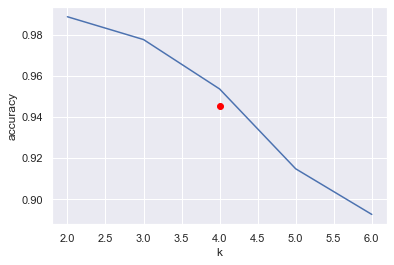

In [61]:
#on trace 

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

sns.set_style("darkgrid")
sns.lineplot(data = df, x = "k", y = "accuracy")

mean = np.mean(df)
var = np.var(df)

#on affiche la moyenne
plt.plot(4,0.945556, marker="o", color="red")

plt
